# Analyze the quality of the grid objective.

We approximated the polygon instance by a graph instance.
Now we check how close the costs of the tour in the graph are to the actual tour in
the polygon.
The touring costs are of course equal, but the coverage of the tour is probably lower
and therefore the opportunity loss is higher.

In [54]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
from _utils import quick_plot_setup

quick_plot_setup(use_tex=False)

In [56]:
data = pd.read_json("./06c_prepared_data.json")
from utils import show_solver_diffs

show_solver_diffs(data)

Solver 0:  with 387 entries


In [57]:
data["solver"].unique()

array(['MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=50, cc_opt_steps=25, cc_opt_size=50, t_opt_steps=25, t_opt_size=50, callbacks=DefaultCallbacks)))'],
      dtype=object)

In [58]:
data["area"] = data["area_x"]
data.columns

Index(['solution', 'coverage', 'touring_cost', 'length', 'integralization',
       'turn_sum', 'instance', 'instance_path', 'grid_lb', 'grid_obj',
       'grid_obj_tour', 'grid_obj_loss', 'runtime', 'timestamp', 'hostname',
       'argv', 'git_revision', 'cwd', 'solver', 'i', 'turn_factor',
       'point_based', 'area_x', 'Obj', 'touring_cost_min', 'relative_cost',
       'relative_coverage', 'type', 'Obj_min', 'relative_obj', 't_opt_steps',
       't_opt_size', 'cc_opt_steps', 'area_y', 'grid_opt_gap', 'obj_gap',
       'value_sum', 'value_density', 'area'],
      dtype='object')

In [59]:
data[data.isna().any(axis=1)]

,solution,coverage,touring_cost,length,integralization,turn_sum,instance,instance_path,grid_lb,grid_obj,...,relative_obj,t_opt_steps,t_opt_size,cc_opt_steps,area_y,grid_opt_gap,obj_gap,value_sum,value_density,area


In [60]:
# data.dropna(inplace=True)
data.drop_duplicates(subset=["instance"], inplace=True)

In [71]:
from pcpptc.instance_converter.dmsh import GmshGrid

data["tc/valuesum"] = data["grid_obj_tour"] / data["value_sum"]
data["tc/valuesum"]

3       0.041773
9       0.042802
15      0.422407
21      0.205561
27      0.275572
          ...   
2360    0.065195
2366    0.111300
2372    0.181143
2378    0.097061
2384    0.084244
Name: tc/valuesum, Length: 387, dtype: float64

In [ ]:
# data = data[data["relative_cost"]<=1000]


from aemeasure.plotting import convert_to_percentage_interval

t = convert_to_percentage_interval(
    table=data[
        ["area", "solver", "instance", "integralization", "grid_opt_gap", "obj_gap"]
    ],
    on_column="area",
    percentage=5,
    round_=round,
)
plt.figure(figsize=(3.5, 3.5))
sns.lineplot(data=t, x="area", y="grid_opt_gap")
plt.ylabel("Optimality gap (%)")
plt.xlabel("Area ($\pm 10\%$)")
plt.tight_layout()
plt.savefig("07_opt_gap_grid_partial.pdf")
plt.show()

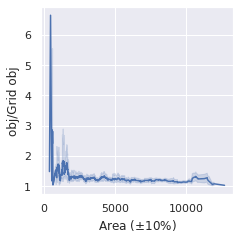

In [63]:
from _utils import convert_to_percentage_interval

t = convert_to_percentage_interval(
    table=data[
        ["area", "solver", "instance", "integralization", "grid_opt_gap", "obj_gap"]
    ],
    on_column="area",
    percentage=5,
    round_=round,
)
plt.figure(figsize=(3.5, 3.5))
sns.lineplot(data=t, x="area", y="obj_gap")
plt.ylabel("obj/Grid obj")
plt.xlabel("Area ($\pm 10\%$)")
plt.tight_layout()
plt.savefig("07_obj_gap.pdf")
plt.show()

/home/ANONYMOUS_USER/anaconda3/envs/turncost/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


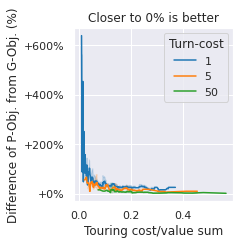

In [105]:
from _utils import convert_to_percentage_interval

data["obj_gap_percent"] = 100 * (data["obj_gap"] - 1)
t = convert_to_percentage_interval(
    table=data, on_column="tc/valuesum", percentage=5, round_=lambda x: round(x, 3)
)
fig = plt.figure(figsize=(3.5, 3.5))
plt.title("Closer to 0% is better")
sns.lineplot(
    data=t, x="tc/valuesum", y="obj_gap_percent", hue="turn_factor", palette="tab10"
)
plt.ylabel("Difference of P-Obj. from G-Obj. (%)")
plt.xlabel("Touring cost/value sum")
plt.legend(title="Turn-cost")
ax = fig.gca()
plt.tight_layout()
ax.set_yticklabels([f"+{int(s)}%" for s in ax.get_yticks()])
# ax.set_yticklabels([f"+{str(s.get_text())}%" for s in ax.get_yticklabels()])
plt.tight_layout()
plt.savefig("./07c_tcvs.pdf")
plt.show()

/home/ANONYMOUS_USER/anaconda3/envs/turncost/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


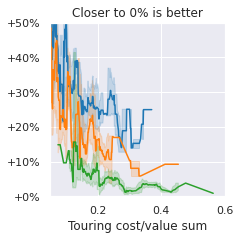

In [106]:
data["obj_gap_percent"] = 100 * (data["obj_gap"] - 1)
t = convert_to_percentage_interval(
    table=data, on_column="tc/valuesum", percentage=5, round_=lambda x: round(x, 3)
)
fig = plt.figure(figsize=(3.5, 3.5))
plt.title("Closer to 0% is better")
sns.lineplot(
    data=t, x="tc/valuesum", y="obj_gap_percent", hue="turn_factor", palette="tab10"
)
plt.ylabel("Difference of P-Obj. from G-Obj. (%)")
plt.xlabel("Touring cost/value sum")
plt.legend(title="Turn-cost")
plt.gca().get_legend().remove()
plt.xlim(0.05, 0.6)
plt.ylim(0, 50)
plt.ylabel("")
ax = fig.gca()
plt.tight_layout()
ax.set_yticklabels([f"+{int(s)}%" for s in ax.get_yticks()])
# ax.set_yticklabels([f"+{str(s.get_text())}%" for s in ax.get_yticklabels()])
plt.tight_layout()
plt.savefig("./07d_tcvs_zoom.pdf")
plt.show()

/home/ANONYMOUS_USER/anaconda3/envs/turncost/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


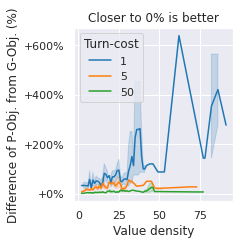

In [108]:
from _utils import convert_to_percentage_interval

data["obj_gap_percent"] = 100 * (data["obj_gap"] - 1)
t = convert_to_percentage_interval(
    table=data[
        [
            "area",
            "solver",
            "turn_factor",
            "instance",
            "integralization",
            "grid_opt_gap",
            "obj_gap_percent",
            "value_density",
        ]
    ],
    on_column="value_density",
    percentage=5,
    round_=round,
)
fig = plt.figure(figsize=(3.5, 3.5))
plt.title("Closer to 0% is better")
sns.lineplot(
    data=t, x="value_density", y="obj_gap_percent", hue="turn_factor", palette="tab10"
)
plt.ylabel("Difference of P-Obj. from G-Obj. (%)")
plt.xlabel("Value density")
plt.legend(title="Turn-cost")
ax = fig.gca()
plt.tight_layout()
ax.set_yticklabels([f"+{int(s)}%" for s in ax.get_yticks()])
# ax.set_yticklabels([f"+{str(s.get_text())}%" for s in ax.get_yticklabels()])
plt.tight_layout()
plt.savefig("./07a_p_vs_g_obj.pdf")
plt.show()

/home/ANONYMOUS_USER/anaconda3/envs/turncost/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


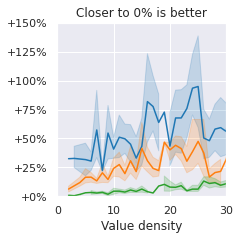

In [110]:
t = convert_to_percentage_interval(
    table=data[
        [
            "area",
            "solver",
            "turn_factor",
            "instance",
            "integralization",
            "grid_opt_gap",
            "obj_gap_percent",
            "value_density",
        ]
    ],
    on_column="value_density",
    percentage=5,
    round_=round,
)
fig = plt.figure(figsize=(3.5, 3.5))
plt.title("Closer to 0% is better")
sns.lineplot(
    data=t, x="value_density", y="obj_gap_percent", hue="turn_factor", palette="tab10"
)
plt.ylabel("Difference of P-Obj. from G-Obj. (%)")
plt.ylabel("")
plt.xlabel("Value density")
plt.xlim(0, 30)
plt.ylim(0, 150)
plt.legend(title="Turn Weight")
plt.gca().get_legend().remove()
plt.tight_layout()
ax = fig.gca()
ax.set_yticklabels([f"+{int(s)}%" for s in ax.get_yticks()])
plt.tight_layout()
plt.savefig("./07b_p_vs_g_obj_zoom.pdf")
plt.show()

In [ ]:
data[data["value_density"] > 30]

In [ ]:
t = convert_to_percentage_interval(
    table=data[
        [
            "area",
            "solver",
            "turn_factor",
            "instance",
            "integralization",
            "grid_opt_gap",
            "obj_gap_percent",
            "value_density",
        ]
    ],
    on_column="area",
    percentage=5,
    round_=lambda x: 200 * round(x / 200),
)
fig = plt.figure(figsize=(3.5, 3.5))
plt.title("Lower is better")
sns.lineplot(data=t, x="area", y="grid_opt_gap", hue="turn_factor", palette="tab10")
plt.ylabel("G-Obj. (% above lower bound)")
plt.xlabel("Area")
plt.legend(title="Turn-cost")
ax = fig.gca()
plt.tight_layout()
ax.set_yticklabels([f"{int(s)}%" for s in ax.get_yticks()])
# ax.set_yticklabels([f"+{str(s.get_text())}%" for s in ax.get_yticklabels()])
plt.tight_layout()
plt.savefig("07e_obj_gap.pdf")
plt.show()

In [ ]:
t = convert_to_percentage_interval(
    table=data, on_column="area", percentage=5, round_=lambda x: 200 * round(x / 200)
)
fig = plt.figure(figsize=(3.5, 3.5))
plt.title("Lower is better")
sns.lineplot(data=t, x="area", y="runtime", palette="tab10")
plt.ylabel("Runtime (s)")
plt.xlabel("Area")
ax = fig.gca()
plt.tight_layout()
# ax.set_yticklabels([f"+{str(s.get_text())}%" for s in ax.get_yticklabels()])
plt.tight_layout()
plt.savefig("07f_runtime_area.pdf")
plt.show()

In [66]:
t = convert_to_percentage_interval(
    table=data, on_column="area", percentage=5, round_=lambda x: 200 * round(x / 200)
)
fig = plt.figure(figsize=(3.5, 3.5))
plt.title("Lower is better")
sns.lineplot(data=t, x="area", y="runtime", palette="tab10")
plt.ylabel("Runtime (s)")
plt.xlabel("Area")
ax = fig.gca()
plt.tight_layout()
# ax.set_yticklabels([f"+{str(s.get_text())}%" for s in ax.get_yticklabels()])
plt.tight_layout()
plt.savefig("07f_runtime_area.pdf")
plt.show()

,solution,coverage,touring_cost,length,integralization,turn_sum,instance,instance_path,grid_lb,grid_obj,...,t_opt_size,cc_opt_steps,area_y,grid_opt_gap,obj_gap,value_sum,value_density,area,tc/valuesum,obj_gap_percent
3,"{'waypoints': [[-14.0087812136, 26.7624438714]...",1888.723561,2966.235523,998.481020,50,240.526155,75,../05_partical_coverage/instances2/75.instance...,2739.771946,2869.087473,...,50,25,2022.358599,4.719938,2.511426,68216.372004,33.731096,2022.358599,0.041773,151.142616
111,"{'waypoints': [[10.0735507683, -4.3875965024],...",2376.980587,5766.311927,1255.912615,50,254.748319,86,../05_partical_coverage/instances2/86.instance...,5002.796887,5209.875238,...,50,25,2492.969981,4.139252,1.750098,86997.039323,34.896946,2492.969981,0.059886,75.009778
177,"{'waypoints': [[7.9742246709, 40.8408630597], ...",2024.244847,4464.431174,1131.500674,50,137.573562,3,../05_partical_coverage/instances2/3.instance....,4306.016072,4526.381861,...,50,25,2113.609580,5.117626,1.327803,80373.905467,38.026846,2113.609580,0.054144,32.780350
445,"{'waypoints': [[35.4880319436, -23.3233390308]...",3382.616278,2446.676219,1780.925707,50,133.150102,38,../05_partical_coverage/instances2/38.instance...,2310.604937,2446.676219,...,50,25,3438.231134,5.888990,1.551816,109167.828013,31.751160,3438.231134,0.022412,55.181570
494,"{'waypoints': [[8.41491246, -14.8898522804], [...",541.902527,3093.237029,297.259236,50,68.304526,5,../05_partical_coverage/instances2/5.instance....,2331.907577,2407.552129,...,50,25,582.653453,3.243891,1.862505,22505.054319,38.625111,582.653453,0.100131,86.250543
500,"{'waypoints': [[-18.9213663965, 13.5227905465]...",2042.798165,20918.021531,1163.413092,50,204.920076,180,../05_partical_coverage/instances2/180.instanc...,24820.134745,25365.420505,...,50,25,2340.967926,2.196949,1.197377,114741.021666,49.014350,2340.967926,0.172258,19.737654
603,"{'waypoints': [[32.107531515, -32.8264213297],...",4017.707862,3936.871120,2092.391129,50,266.774525,121,../05_partical_coverage/instances2/121.instanc...,3463.058852,3597.964734,...,50,25,4219.353655,3.895570,2.132241,169316.611913,40.128566,4219.353655,0.020698,113.224066
696,"{'waypoints': [[-14.9391169269, -12.1347882968...",539.447590,328.583386,276.332737,50,52.250649,96,../05_partical_coverage/instances2/96.instance...,322.006307,328.583386,...,50,25,583.203825,2.042531,5.543692,20951.222630,35.924357,583.203825,0.015683,454.369231
796,"{'waypoints': [[-4.5971769126, 28.5410804974],...",3275.141393,10819.959387,2065.931836,50,148.801572,44,../05_partical_coverage/instances2/44.instance...,8609.248778,10970.557107,...,50,25,3342.732139,27.427577,1.148493,141035.948206,42.191819,3342.732139,0.076846,14.849323
844,"{'waypoints': [[-16.3399979194, 15.7604737175]...",1556.268501,1293.770355,812.117484,50,150.305676,194,../05_partical_coverage/instances2/194.instanc...,1239.491853,1292.201507,...,50,25,1659.201589,4.252521,3.492672,61054.018929,36.797228,1659.201589,0.021163,249.267202


In [ ]:
t = convert_to_percentage_interval(
    table=data[
        [
            "area",
            "solver",
            "turn_factor",
            "instance",
            "integralization",
            "grid_opt_gap",
            "obj_gap_percent",
            "value_density",
        ]
    ],
    on_column="area",
    percentage=5,
    round_=lambda x: 200 * round(x / 200),
)
fig = plt.figure(figsize=(3.5, 3.5))
plt.title("Lower is better")
sns.lineplot(data=t, x="area", y="grid_opt_gap", hue="turn_factor", palette="tab10")
plt.ylabel("G-Obj. (% above lower bound)")
plt.xlabel("Area")
plt.legend(title="Turn-cost")
ax = fig.gca()
plt.tight_layout()
ax.set_yticklabels([f"{int(s)}%" for s in ax.get_yticks()])
# ax.set_yticklabels([f"+{str(s.get_text())}%" for s in ax.get_yticklabels()])
plt.tight_layout()
plt.savefig("07e_obj_gap.pdf")
plt.show()

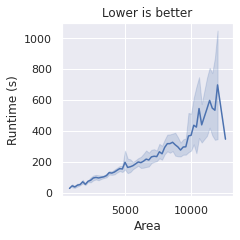

In [129]:
t = convert_to_percentage_interval(
    table=data, on_column="area", percentage=5, round_=lambda x: 200 * round(x / 200)
)
fig = plt.figure(figsize=(3.5, 3.5))
plt.title("Lower is better")
sns.lineplot(data=t, x="area", y="runtime", palette="tab10")
plt.ylabel("Runtime (s)")
plt.xlabel("Area")
ax = fig.gca()
plt.tight_layout()
# ax.set_yticklabels([f"+{str(s.get_text())}%" for s in ax.get_yticklabels()])
plt.tight_layout()
plt.savefig("07f_runtime_area.pdf")
plt.show()